In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_roc_curve
import itertools
from pandas_profiling import ProfileReport
#import pandas_profiling
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint


plt.style.use('bmh')
from scipy.stats import iqr
import warnings
warnings.filterwarnings('ignore')

In [69]:
cs=pd.read_csv('~/Projet_ML/BreastCancers.csv').T


## Data Pre Processing

In [70]:
new_header = cs.iloc[0]
cs = cs[1:] # data sans header
cs.columns = new_header
cs.head(5)

Sample_geo_accession,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,ER_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,BR_FNA_M157,breast cancer cells,57,white,RD,2,0,2,P,P,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,BR_FNA_M196,breast cancer cells,69,asian,RD,2,1,2,P,P,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,BR_FNA_M176,breast cancer cells,77,mixed,RD,4,1,2,N,P,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,BR_FNA_M214,breast cancer cells,54,white,RD,2,1,2,N,P,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,BR_FNA_M113,breast cancer cells,75,black,RD,2,0,3,N,N,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


#### Il y a 279 observations et 22298 variables
#### Nous sommes dans un cas où le nombre de variables > que le nombre d'observations

Commonly Used Strategies for Sparse Modeling

Actually it depends on many other factors. SVM reportedly do well in this case.

You can also try to apply dimensionality reduction techniques like PCA, Singular Value Decomposition (SVD) or Matrix Factorization , Boltzmann machine etc. to reduce the the feature space and learn latent feature capturing the most the variance present in your data. Then apply to any other Machine Learning technique and check the performances.

You can also consider using deep network as it learns higher order representation of the data automatically.

1. AllSubsetsRegression
• Fit all possible linear models for all levels of sparsity.
2. ForwardStepwiseRegression
• Greedy approach that chooses each variable in the model sequentially by significance level.
3. LASSO(Tibshirani1994),LARS(Efron,Hastie, Johnstone, Tibshirani 2002)
• ‘shrinks’ some coefficient estimates to zero.

https://web.stanford.edu/~vcs/talks/MicrosoftMay082008.pdf

### Analyse des données

#### Analyse des variables qualitatives

#### Analyse de la variable réponse

La variable treatment_response est notre variable Y: Elle est de type binaire: RD ou pCR

In [71]:
set(cs['treatment_response'])

{'RD', 'her2 status: N', 'pCR', 'pr_status: N', 'pr_status: P'}

La variable réponse a 5 catégories, dont 3 :
 - 'her2 status: N'
 - 'pr_status: N'
 - 'pr_status: P'
    
semblent être des erreurs. Je vais les enlever de la base de données.
Enfin, la variable treatment response n'aura que les 2 modalités: pCR et RD.

In [72]:
cs=cs[(cs.treatment_response != 'her2 status: N') & (cs.treatment_response != 'pr_status: N')& (cs.treatment_response != 'pr_status: P')]

In [73]:
set(cs['treatment_response'])

{'RD', 'pCR'}

La variable réponse, treatment_response a bien 2 modalités

#### Outliers 

In [74]:
# FAIRE UNE TSNE SI POSSIBLE

In [75]:
numerical_columns = list(cs.columns[15:]) # colonnes génétiques

In [76]:
# AJOUT PLOT DES VARIABLES NON GENETIQUES

<AxesSubplot:xlabel='ethnicity', ylabel='AFFX-ThrX-3_at'>

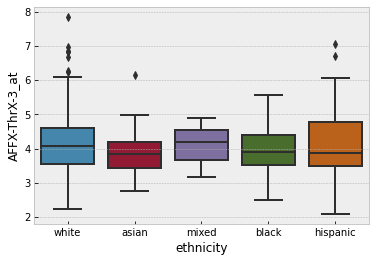

In [77]:
sns.boxplot(x='ethnicity', y='AFFX-ThrX-3_at', data=cs)

<AxesSubplot:xlabel='ethnicity', ylabel='AFFX-r2-Hs28SrRNA-5_at'>

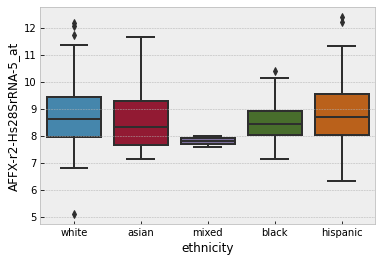

In [78]:
sns.boxplot(x='ethnicity', y='AFFX-r2-Hs28SrRNA-5_at', data=cs)

### Analyse des valeurs manquantes

In [79]:
missing_data = pd.DataFrame({'total_missing': cs.isnull().sum(axis = 0), 'perc_missing': (cs.isnull().sum()/len(cs))*100})   

missing_data

,total_missing,perc_missing
Sample_geo_accession,,
Sample_title,0,0.0
tissue,0,0.0
age,0,0.0
ethnicity,0,0.0
treatment_response,0,0.0
...,...,...
AFFX-ThrX-5_at,0,0.0
AFFX-ThrX-M_at,0,0.0
AFFX-TrpnX-3_at,0,0.0


In [80]:
columns_with_missing_values = missing_data.loc[missing_data['perc_missing']>0]
columns_with_missing_values

,total_missing,perc_missing
Sample_geo_accession,,
treatment code,11,4.104478


Les 10 observations manquantes dans la variable 11, her2_status, sont également manquantes dans la variable 12,histology. Cette dernière 
Comme nous n'avons pas beaucoup d'observations comparés aux variables nous n'allons pas enlever les observations de notre base de données.
De plus, comme il y a beaucoup de valeurs manquantes surtout pour les variables 11 et 12, nous allons utiliser une technique d'imputation, soit nous allons assigner à chacune des valeurs manquantes, une valeur calculée.
Il existe différentes techniques d'imputation ou d'assignation des valeurs manquantes. Voici les plus communes:
- l'utilisation de la valeur moyenne d'une variable, aussi appelé 'mean imputation'.
- l'utilisation de la valeur moyenne des k plus proches voisins associés à des données entrainés, aussi appelé knn imputation
- l'utilisation de la fréquence, une technique généralement utilisée lorsque les variables sont qualitatives.

Comme la variable 11, her2_status et la variable histology sont de type qualitatives, nous utiliserons la fréquence comme technique d'assignation. 


In [81]:
# Je crée une liste des variables ayant des données manquantes
missing_variables=(columns_with_missing_values.index).tolist()
missing_variables

['treatment code']

In [82]:
# Je remplace les valeurs manquantes par les valeurs les plus communes des variables.
quali = cs.loc[:,missing_variables].apply(lambda x: x.fillna(x.value_counts().index[0]))
# Je crée un dataframe SANS les variables de la liste missing_variables
cs_without_quali = cs.drop(missing_variables, axis=1) # ok, il manque bien les 5 colonnes manquantes

In [83]:
# Je crée un nouveau dataframe joignant toutes les variables.
cs_imputed=pd.concat([quali,cs_without_quali],axis=1)
cs_imputed.head(5) # il y a bien toutes les colonnes et lignes (278 x 22298)

Sample_geo_accession,treatment code,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,TFAC,BR_FNA_M157,breast cancer cells,57,white,RD,2,0,2,P,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,TFAC,BR_FNA_M196,breast cancer cells,69,asian,RD,2,1,2,P,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,TFAC,BR_FNA_M176,breast cancer cells,77,mixed,RD,4,1,2,N,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,TFAC,BR_FNA_M214,breast cancer cells,54,white,RD,2,1,2,N,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,TFAC,BR_FNA_M113,breast cancer cells,75,black,RD,2,0,3,N,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


In [84]:
# Attention

In [85]:
#profile=pandas_profiling.ProfileReport(cs_imputed)

#### Nous procédons maintenant au encoding
There are many ways to do so:

Label encoding where you choose an arbitrary number for each category
One-hot encoding where you create one binary column per category
Vector representation a.k.a. word2vec where you find a low dimensional subspace that fits your data
Optimal binning where you rely on tree-learners such as LightGBM or CatBoost
Target encoding where you average the target value by category

Je choisi d'utiliser LabelEncoding

In [86]:
# Je commence par enlever la colonne ID_Ref qui est une répétition de l'indice
cs_imputed=cs_imputed.drop('ID_REF', 1)
cs_imputed.head(5)

Sample_geo_accession,treatment code,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,TFAC,BR_FNA_M157,breast cancer cells,57,white,RD,2,0,2,P,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,TFAC,BR_FNA_M196,breast cancer cells,69,asian,RD,2,1,2,P,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,TFAC,BR_FNA_M176,breast cancer cells,77,mixed,RD,4,1,2,N,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,TFAC,BR_FNA_M214,breast cancer cells,54,white,RD,2,1,2,N,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,TFAC,BR_FNA_M113,breast cancer cells,75,black,RD,2,0,3,N,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


In [87]:
Y=cs_imputed['treatment_response']
X=cs_imputed.drop('treatment_response',1)
Y

GSM505327    RD
GSM505328    RD
GSM505329    RD
GSM505330    RD
GSM505331    RD
             ..
GSM505601    RD
GSM505602    RD
GSM505603    RD
GSM505604    RD
GSM505605    RD
Name: treatment_response, Length: 268, dtype: object

In [88]:
# Listes des variables qualitatives et quantititaves
categorical_columns = list(cs_imputed.columns[:14]) # colonnes catégorielles
categorical_columns

['treatment code',
 'Sample_title',
 'tissue',
 'age',
 'ethnicity',
 'treatment_response',
 'T (tumor)',
 'N (Node)',
 'bmn_grade',
 'PR_status: ',
 'ER_status: ',
 'her2_status',
 'histology',
 'MAQC_Distribution_Status']

#### Nous standardisons les données quantitatives

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].
In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.

By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

Je n'ai pas détecté d'outliers flagrant: Je choisi Standard Scaler

In [89]:
scaler = StandardScaler()
scaler.fit_transform(cs_imputed.iloc[:,14:].values)
#scaler.fit_transform(numerical_columns)

array([[ 0.93465939,  0.3463953 , -1.14600441, ..., -1.43328322,
        -1.03473567, -1.05792573],
       [ 0.56078945, -0.32232983,  0.30009164, ...,  1.02318208,
        -0.96192125, -0.55005759],
       [ 1.28304169,  0.73198979, -0.3790667 , ...,  0.72636323,
        -1.23895437, -0.56013119],
       ...,
       [ 0.12719244, -0.92911206,  0.52114106, ...,  0.76579586,
        -1.60994655, -0.40540515],
       [-0.20583586, -0.47938087,  0.85481307, ..., -0.43208269,
         0.30383488,  0.6476827 ],
       [ 0.22146601, -0.15289021, -0.43427385, ...,  1.3998364 ,
         0.43377826,  0.97909297]])

In [90]:
cs_imputed.head(5)

Sample_geo_accession,treatment code,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,TFAC,BR_FNA_M157,breast cancer cells,57,white,RD,2,0,2,P,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,TFAC,BR_FNA_M196,breast cancer cells,69,asian,RD,2,1,2,P,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,TFAC,BR_FNA_M176,breast cancer cells,77,mixed,RD,4,1,2,N,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,TFAC,BR_FNA_M214,breast cancer cells,54,white,RD,2,1,2,N,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,TFAC,BR_FNA_M113,breast cancer cells,75,black,RD,2,0,3,N,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


#### Treating outliers

In [91]:
# J'enleve des outliers si présent - j'utilise cette méthode uniquement pour les variables quantitatives

In [92]:
Q1 = cs_imputed.iloc[:,14:].quantile(0.25)
Q3 = cs_imputed.iloc[:,14:].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
cs_imputed.iloc[:,14:] = cs_imputed[~((cs_imputed.iloc[:,14:] < (Q1 - 1.5 * IQR)) |(cs_imputed.iloc[:,14:] > (Q3 + 1.5 * IQR))).any(axis=1)]
cs_imputed.shape


Series([], dtype: float64)


(268, 22297)

Comme le shape n'a pas changé on voit qu'il n'y a pas eu de outliers parmi les variables quantitatives (génétiques)

#### LabelEncoding

In [93]:
# On converti les strings en nombres - on commence donc par faire le label encoding
le = LabelEncoder() 
for catvar in categorical_columns: 
    cs_imputed[catvar]= le.fit_transform(cs_imputed[catvar]) 


In [94]:
# Puis je procède avec one hot encoding
# Cette étape est importante pour permettre l'utilisation du PCA en autre

In [95]:
cs_imputed_encoded = pd.get_dummies(cs_imputed, columns=categorical_columns, drop_first=True)
cs_imputed_encoded

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,histology_19,histology_20,histology_21,histology_22,histology_23,histology_24,histology_25,MAQC_Distribution_Status_1,MAQC_Distribution_Status_2,MAQC_Distribution_Status_3
GSM505327,12.444,8.3774,6.7866,10.2851,5.9064,8.3767,8.0356,6.6745,6.2325,6.845,...,0,0,0,0,0,0,0,1,0,0
GSM505328,12.2005,7.8592,8.0963,10.4624,4.9582,9.2973,7.0581,6.4607,6.9047,5.8878,...,0,0,0,0,0,0,0,1,0,0
GSM505329,12.6709,8.6762,7.4812,10.1887,5.2332,9.1721,8.6061,7.0932,6.594,5.6843,...,0,0,0,0,0,0,0,1,0,0
GSM505330,11.6619,8.2557,7.9923,10.7705,6.3296,9.3777,8.4776,6.5878,6.0877,6.5169,...,0,0,0,0,0,0,0,1,0,0
GSM505331,11.8397,8.7971,7.8321,10.2869,5.8389,7.0841,7.3419,7.3167,6.3456,6.1708,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM505601,11.8023,7.8182,8.0532,11.2096,6.7603,10.0453,8.3714,4.8747,10.312,7.1426,...,0,0,0,0,0,0,0,0,1,0
GSM505602,11.4574,8.0488,8.2875,11.0754,6.8105,9.0332,8.4071,5.3538,11.2255,6.3486,...,1,0,0,0,0,0,0,0,1,0
GSM505603,11.9181,7.389,8.2965,10.8386,6.735,8.939,8.2275,5.9537,11.9945,6.14,...,1,0,0,0,0,0,0,0,1,0
GSM505604,11.7012,7.7375,8.5987,11.3588,7.5786,9.5624,8.5748,8.1305,6.7621,6.8786,...,0,1,0,0,0,0,0,0,1,0


In [96]:
cs_imputed_encoded

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,histology_19,histology_20,histology_21,histology_22,histology_23,histology_24,histology_25,MAQC_Distribution_Status_1,MAQC_Distribution_Status_2,MAQC_Distribution_Status_3
GSM505327,12.444,8.3774,6.7866,10.2851,5.9064,8.3767,8.0356,6.6745,6.2325,6.845,...,0,0,0,0,0,0,0,1,0,0
GSM505328,12.2005,7.8592,8.0963,10.4624,4.9582,9.2973,7.0581,6.4607,6.9047,5.8878,...,0,0,0,0,0,0,0,1,0,0
GSM505329,12.6709,8.6762,7.4812,10.1887,5.2332,9.1721,8.6061,7.0932,6.594,5.6843,...,0,0,0,0,0,0,0,1,0,0
GSM505330,11.6619,8.2557,7.9923,10.7705,6.3296,9.3777,8.4776,6.5878,6.0877,6.5169,...,0,0,0,0,0,0,0,1,0,0
GSM505331,11.8397,8.7971,7.8321,10.2869,5.8389,7.0841,7.3419,7.3167,6.3456,6.1708,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM505601,11.8023,7.8182,8.0532,11.2096,6.7603,10.0453,8.3714,4.8747,10.312,7.1426,...,0,0,0,0,0,0,0,0,1,0
GSM505602,11.4574,8.0488,8.2875,11.0754,6.8105,9.0332,8.4071,5.3538,11.2255,6.3486,...,1,0,0,0,0,0,0,0,1,0
GSM505603,11.9181,7.389,8.2965,10.8386,6.735,8.939,8.2275,5.9537,11.9945,6.14,...,1,0,0,0,0,0,0,0,1,0
GSM505604,11.7012,7.7375,8.5987,11.3588,7.5786,9.5624,8.5748,8.1305,6.7621,6.8786,...,0,1,0,0,0,0,0,0,1,0


In [97]:
# Je retrouve la variable réponse
cs_imputed_encoded.filter(regex='treatment_response')

,treatment_response_1
GSM505327,0
GSM505328,0
GSM505329,0
GSM505330,0
GSM505331,0
...,...
GSM505601,0
GSM505602,0
GSM505603,0
GSM505604,0


## Model selection

In [98]:
X=cs_imputed_encoded.iloc[:, cs_imputed_encoded.columns != 'treatment_response_1']
y=cs_imputed_encoded.treatment_response_1

In [99]:
# Ici on fait un simple split aléatoire à 35% test, le reste étant train.

In [100]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X, y, test_size=0.35,random_state=42)

#### Reduction de dimension

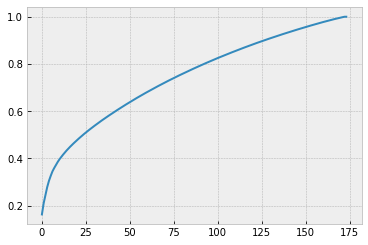

In [101]:
pca1=PCA()
pca1.fit(Xf_train)
cum_sum=np.cumsum(pca1.explained_variance_ratio_)
plt.plot(cum_sum)

In [102]:
Xf_train.shape[1]

22701

In [103]:
d=np.argmax(cum_sum>=0.95)+1
d

149

In [104]:
pca = PCA(0.95) #ici on dit qu'on veut garder 60% de la variance expliquée
Xf_train = pca.fit_transform(Xf_train)
Xf_test = pca.transform(Xf_test)

In [105]:
Xf_train.shape[1]

149

In [106]:
# Alors bous

### Plot confusion matrix

In [107]:
#Plotting the confusion matrix
class_names=['RD','pCR']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [108]:
# On utilise le gridsearchCV avec une validation croisée de 4.

In [109]:
parameters = [{'C':[0.0001,0.001,0.005,0.01,0.1,1,10,50,100,500,1000], 'kernel':['rbf'], 'gamma': [0.0001,0.01,0.1,0.125,0.15,0.17,0.2]}]
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring ='accuracy',cv=4,n_jobs=4)

C régle le taux de souplesse. Plus il est grand, moins les erreurs de classification sont 'tolérées'. Le biais est plus grand dans ce cas. À l'inverse plus C est petit plus il y a un risque d'apprentissage, la variance est plus.
Gamma est utilisé lorsqu'on utilise des noyaux tel que le gaussien, rbf. C'est un paramètre qui décide du degré de courbure de la 'zone de séparation'. 

À l'aide de la fonction gridsearchCV nous testons une gamme de C et de gamma, afin d'obtenir le bon équilibre de biais-variance et afin d'éviter le surapprentissage.

In [38]:
model_svm = grid_search.fit(Xf_train,yf_train)

In [39]:
best_accuracy_svm = model_svm.best_score_
best_accuracy_svm

0.8336416490486258

In [40]:
opt_param = model_svm.best_params_
opt_param

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [41]:
n_scores_svm = cross_val_score(model_svm, Xf_train, yf_train, scoring='accuracy', cv=4, n_jobs=4)
n_scores_svm

array([0.81818182, 0.79545455, 0.8372093 , 0.81395349])

In [42]:
Erreur_validation_croisee_moyen_SVM=np.mean(1-n_scores_svm)
Erreur_validation_croisee_moyen_SVM

0.18380021141649047

L'erreur de validation croisée des données d'entrainement n'est pas très élevé, soit, 22.4%.

In [43]:
print('Accuracy_score_test: ',model_svm.best_estimator_.score(Xf_test,yf_test))
print('Erreur_test: ',1-model_svm.best_estimator_.score(Xf_test,yf_test))

Accuracy_score_test:  0.8297872340425532
Erreur_test:  0.17021276595744683


L'erreur_test est de 17.02% Elle est légèrement plus basse que l'erreur d'apprentissage. 

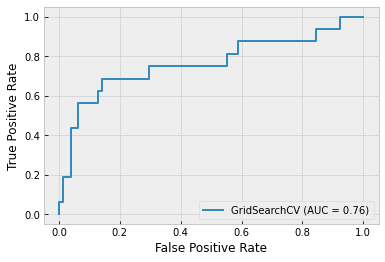

In [44]:
svm_disp_svm = plot_roc_curve(model_svm, Xf_test, yf_test)
svm_disp_svm

Nous cherchons maintenant à regarder les résultats dans un peu plus de détails.

In [45]:
y_predicted_svm=model_svm.predict(Xf_test)
y_predicted_svm

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0], dtype=uint8)

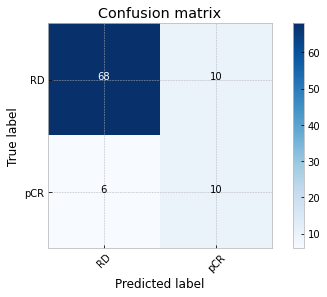

In [46]:
cm_svm=confusion_matrix(yf_test,y_predicted_svm)
plot_confusion_matrix(cm_svm, classes=class_names, title='Confusion matrix')

Nous voyons que le modèle SVM classe toutes les données test dans la classe RD. Ainsi bien que l'erreur de test est relativement bas, le modèle SVM ne semble pas bien adapté à notre jeu de données car il classe toutes les données dans une seule classe. 

### Gradient Boosting

In [47]:
model_xgb = XGBClassifier()
n_scores_xgb = cross_val_score(model_xgb, Xf_train, yf_train, scoring='accuracy', cv=4, n_jobs=4)
n_scores_xgb

array([0.86363636, 0.81818182, 0.8372093 , 0.81395349])

In [48]:
Erreur_CV_xgb=np.mean(1-n_scores_xgb)
Erreur_CV_xgb

0.16675475687103591

L'erreur de validation croisée sur les données train est de 16.67%.

In [49]:
model_xgb.fit(Xf_train, yf_train)
y_predicted = model_xgb.predict(Xf_test)

In [50]:
print('Accuracy_score_test_xgb: ',model_xgb.score(Xf_test,yf_test))
print('Erreur_test_xgb: ',1-model_xgb.score(Xf_test,yf_test))

Accuracy_score_test_xgb:  0.8617021276595744
Erreur_test_xgb:  0.13829787234042556


L'erreur de test est plus bas que l'erreur d'apprentissage, soit 13.8% au lieu de 16.67%

In [51]:
cm_xgb=confusion_matrix(yf_test,y_predicted)
cm_xgb

array([[76,  2],
       [11,  5]])

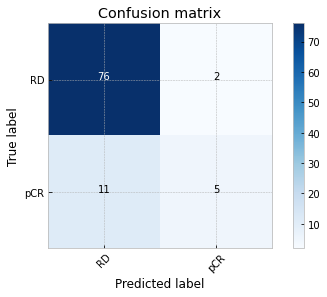

In [52]:
plot_confusion_matrix(cm_xgb, classes=class_names, title='Confusion matrix')

In [53]:
print(classification_report(yf_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        78
           1       0.71      0.31      0.43        16

    accuracy                           0.86        94
   macro avg       0.79      0.64      0.68        94
weighted avg       0.85      0.86      0.84        94



Le modèle XGBoost donne de meilleur résultat que le modèle SVM. Nous avons un taux d'accuracy en 86%.

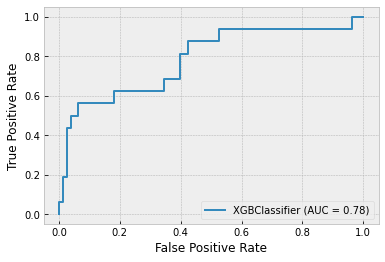

In [54]:
xgb_disp_xgb = plot_roc_curve(model_xgb, Xf_test, yf_test)
xgb_disp_xgb

### Random Forest

In [177]:
param_grid_RF = {
    'bootstrap': [True,False],
    'max_depth': [300,400,500,550,600,650,670],
    'max_features': [10,12,14,16,18,20,30,40],
    'min_samples_leaf': [5,6,8,10,15],
    'min_samples_split': [2,3,4,5,8,9,10],
    'n_estimators': [10,15,18,20,22,23,25,30]
}

RF=RandomForestClassifier()

grid_search_RF = GridSearchCV(estimator = RF, param_grid = param_grid_RF, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [178]:
# ATTENTION DURE A PEU PRES 14-15MIN
grid_search_RF.fit(Xf_train, yf_train)


Fitting 3 folds for each of 31360 candidates, totalling 94080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 6514 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9754 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 11616 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 13642 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 15828 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 18178 tasks   

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [300, 400, 500, 550, 600, 650, 670],
                         'max_features': [10, 12, 14, 16, 18, 20, 30, 40],
                         'min_samples_leaf': [5, 6, 8, 10, 15],
                         'min_samples_split': [2, 3, 4, 5, 8, 9, 10],
                         'n_estimators': [10, 15, 18, 20, 22, 23, 25, 30]},
             verbose=2)

In [179]:
grid_search_RF.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=600, max_features=40,
                       min_samples_leaf=5, n_estimators=22)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        78
           1       1.00      0.06      0.12        16

    accuracy                           0.84        94
   macro avg       0.92      0.53      0.51        94
weighted avg       0.87      0.84      0.78        94



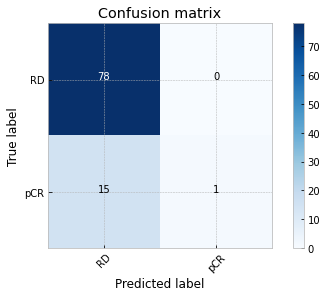

In [180]:
y_pred_RF = grid_search_RF.predict(Xf_test)
print(classification_report(yf_test, y_pred_RF))
cm_RF = confusion_matrix(yf_test,y_pred_RF)
plot_confusion_matrix(cm_RF, classes=class_names, title='Confusion matrix')

In [114]:
# Résultat robuste pour Random Forest

### Régression Logistique

In [202]:
model_logit=LogisticRegression(random_state=0)
model_logit.fit(Xf_train,yf_train)

LogisticRegression(random_state=0)

In [203]:
y_pred_logit = model_logit.predict(Xf_test)

In [204]:
cm_logit = confusion_matrix(yf_test,y_pred_logit)
cm_logit

array([[73,  5],
       [10,  6]])

In [205]:
accuracies = cross_val_score(estimator=model_logit,X=Xf_train,y=yf_train,cv=4)
accuracies

array([0.79545455, 0.77272727, 0.79069767, 0.74418605])

### Régression Pénalisée

In [206]:
model_lasso_lars=LassoLarsCV(cv=4, precompute=False).fit(Xf_train,yf_train)

In [207]:
# print variable names and regression coefficients
dict(zip(pd.DataFrame(Xf_train).columns, model_lasso_lars.coef_))

{0: 0.0,
 1: 0.0036832871449937357,
 2: -0.0014108984506192072,
 3: 0.0007377900715908447,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: -0.00015451905596221472,
 8: 0.0,
 9: 0.0,
 10: -0.002816646179489525,
 11: 0.0,
 12: 0.0029116914977718547,
 13: -0.001570337173648846,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.00016607722778696438,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0004194016094231094,
 37: 0.0,
 38: 0.00419463988257328,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0002460588909834083}

Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

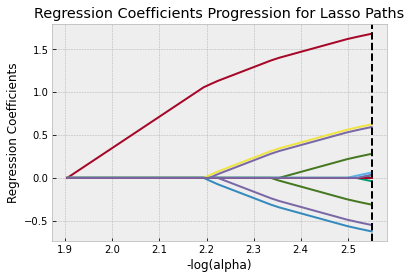

In [208]:
# plot coefficient progression
m_log_alphas = -np.log10(model_lasso_lars.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model_lasso_lars.coef_path_.T)
plt.axvline(-np.log10(model_lasso_lars.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

In [209]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(yf_train, model_lasso_lars.predict(Xf_train))
test_error = mean_squared_error(yf_test, model_lasso_lars.predict(Xf_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.1212305507150937
test data MSE
0.12366197151308685


In [210]:
# R-square from training and test data
rsquared_train=model_lasso_lars.score(Xf_train,yf_train)
rsquared_test=model_lasso_lars.score(Xf_test,yf_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.3028725254605553
test data R-square
0.12445738758843339


In [ ]:
# Ridge 

In [ ]:
# On refait mais avec uniquement les variables genetiques

In [241]:
cs_imputed.head(5)

Sample_geo_accession,treatment code,Sample_title,tissue,age,ethnicity,treatment_response,T (tumor),N (Node),bmn_grade,PR_status:,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,2,25,0,29,4,0,2,0,1,1,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,2,40,0,41,0,0,2,1,1,1,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,2,30,0,47,3,0,4,1,1,0,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,2,47,0,26,4,0,2,1,1,0,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,2,4,0,46,1,0,2,0,2,0,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769


In [242]:
categorical_columns.remove('treatment_response')

In [246]:
for catvar in categorical_columns:
    cs_imputed=cs_imputed.drop(catvar,axis=1)

In [248]:
cs_imputed

Sample_geo_accession,treatment_response,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM505327,0,12.444,8.3774,6.7866,10.2851,5.9064,8.3767,8.0356,6.6745,6.2325,...,7.4678,9.3738,15.6236,15.2785,3.2915,3.6526,2.6412,1.2652,3.069,2.0271
GSM505328,0,12.2005,7.8592,8.0963,10.4624,4.9582,9.2973,7.0581,6.4607,6.9047,...,9.6656,8.85,15.3234,15.1286,3.3811,2.588,4.4798,4.8098,3.1637,2.4758
GSM505329,0,12.6709,8.6762,7.4812,10.1887,5.2332,9.1721,8.6061,7.0932,6.594,...,7.6012,8.2567,15.4604,15.2674,3.1665,3.9743,5.2597,4.3815,2.8034,2.4669
GSM505330,0,11.6619,8.2557,7.9923,10.7705,6.3296,9.3777,8.4776,6.5878,6.0877,...,7.6331,9.0089,15.5185,15.1655,4.0045,3.8503,5.9114,0.7882,3.1831,3.482
GSM505331,0,11.8397,8.7971,7.8321,10.2869,5.8389,7.0841,7.3419,7.3167,6.3456,...,8.0249,9.2004,15.3143,14.9506,3.0514,3.2946,5.1537,3.9179,3.1881,2.9769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM505601,0,11.8023,7.8182,8.0532,11.2096,6.7603,10.0453,8.3714,4.8747,10.312,...,9.5479,10.9442,16.0837,15.6543,5.2,4.1865,4.533,3.1679,5.9392,3.5784
GSM505602,0,11.4574,8.0488,8.2875,11.0754,6.8105,9.0332,8.4071,5.3538,11.2255,...,9.6936,10.9484,16.1763,15.8729,4.303,4.0989,3.8379,5.6705,5.8172,2.1837
GSM505603,0,11.9181,7.389,8.2965,10.8386,6.735,8.939,8.2275,5.9537,11.9945,...,7.7356,9.9604,15.6575,15.3779,5.2125,3.8788,4.0721,4.4384,2.3209,2.6036
GSM505604,0,11.7012,7.7375,8.5987,11.3588,7.5786,9.5624,8.5748,8.1305,6.7621,...,8.8167,10.812,16.4401,15.9739,5.379,4.3518,4.825,2.7099,4.8099,3.534
